#**Data** **Preprocessing**




Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading the dataset

In [ ]:
df=pd.read_csv('/content/Concrete_Data_Yeh.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
print(X)

[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]


In [ ]:
print(y)

[79.99 61.89 40.27 ... 23.7  32.77 32.4 ]


Checking missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
print(df.isnull().sum())

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


In [ ]:
df.fillna(df.mean(),inplace=True)

Splitting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#**Model Implementation**

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=lin_reg.predict(X_test)

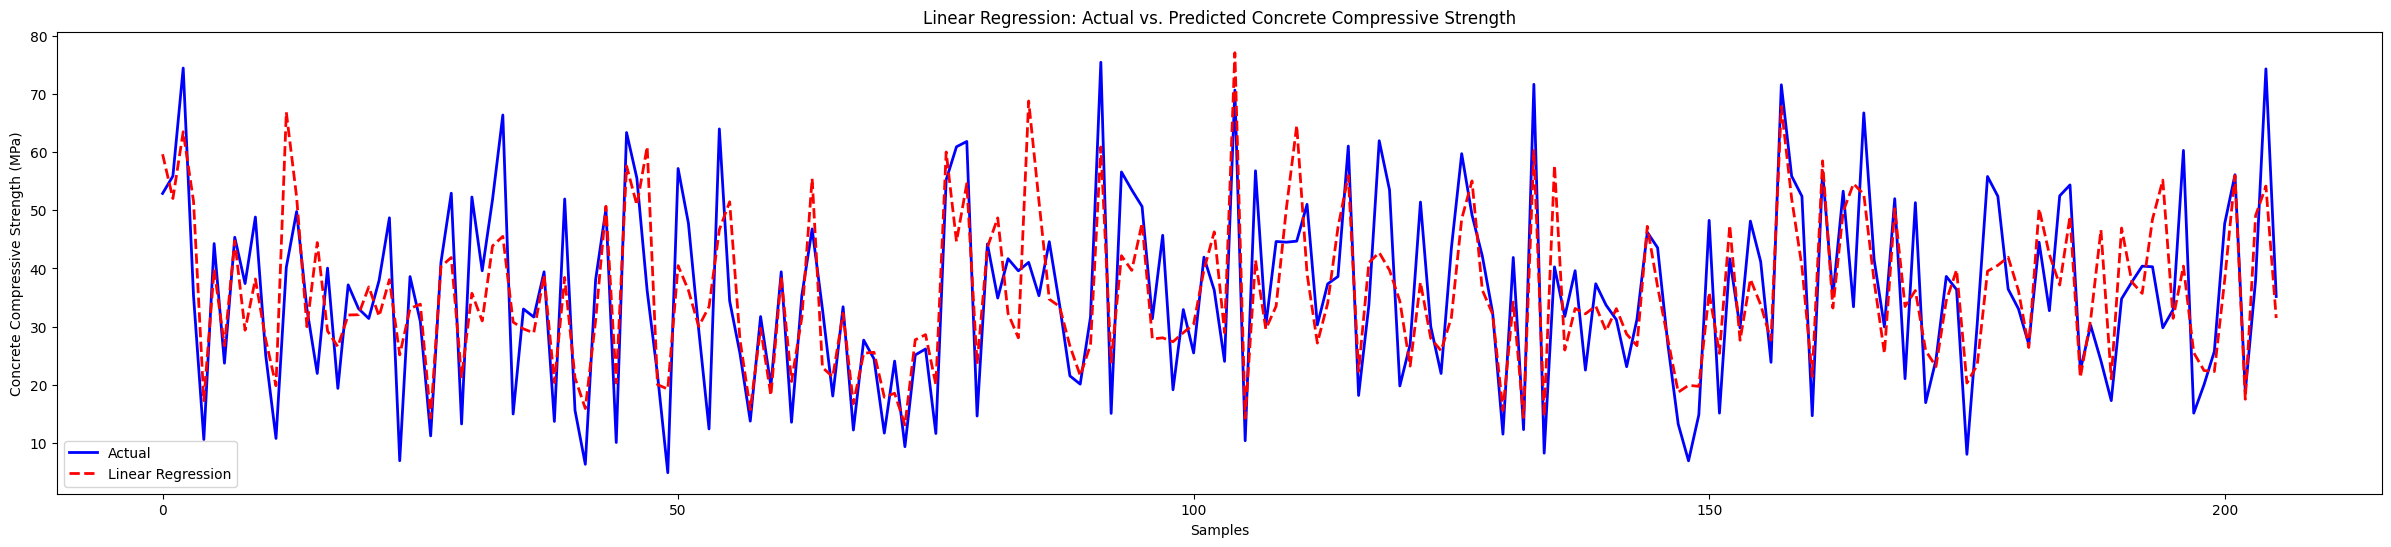

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 6))
plt.plot(y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred, label='Linear Regression', linestyle='--', color='red', linewidth=2)
plt.xlabel('Samples')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.title('Linear Regression: Actual vs. Predicted Concrete Compressive Strength')
plt.legend()
plt.show()

Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [ ]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred_poly = poly_reg.predict(X_test_poly)

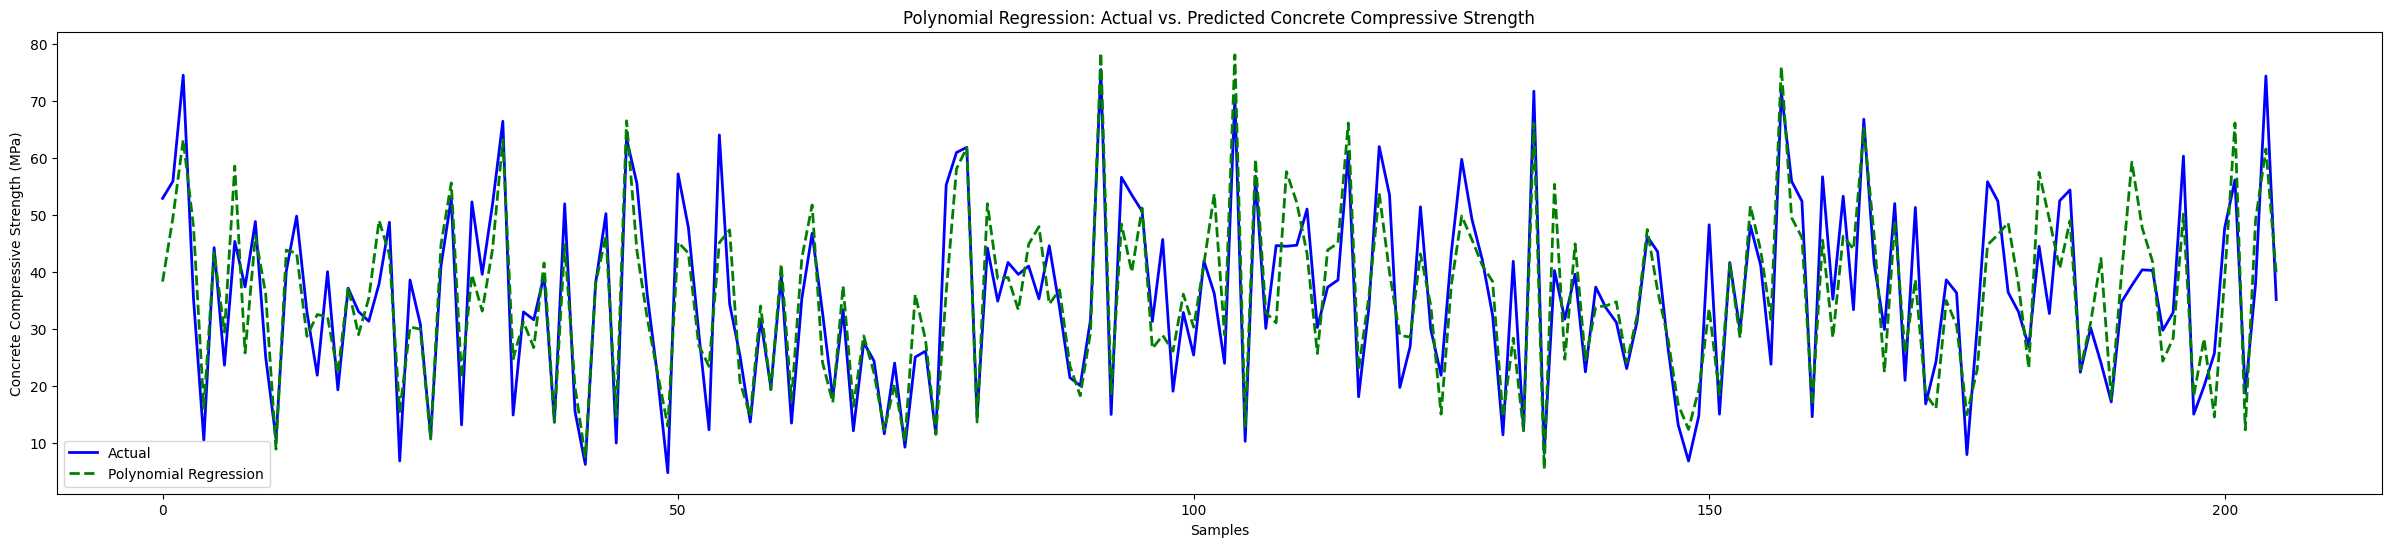

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred_poly, label='Polynomial Regression', linestyle='--', color='green', linewidth=2)
plt.xlabel('Samples')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.title('Polynomial Regression: Actual vs. Predicted Concrete Compressive Strength')
plt.legend()
plt.show()


Support Vector Regression(SVR)

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [ ]:
y_pred_svr = svr.predict(X_test)

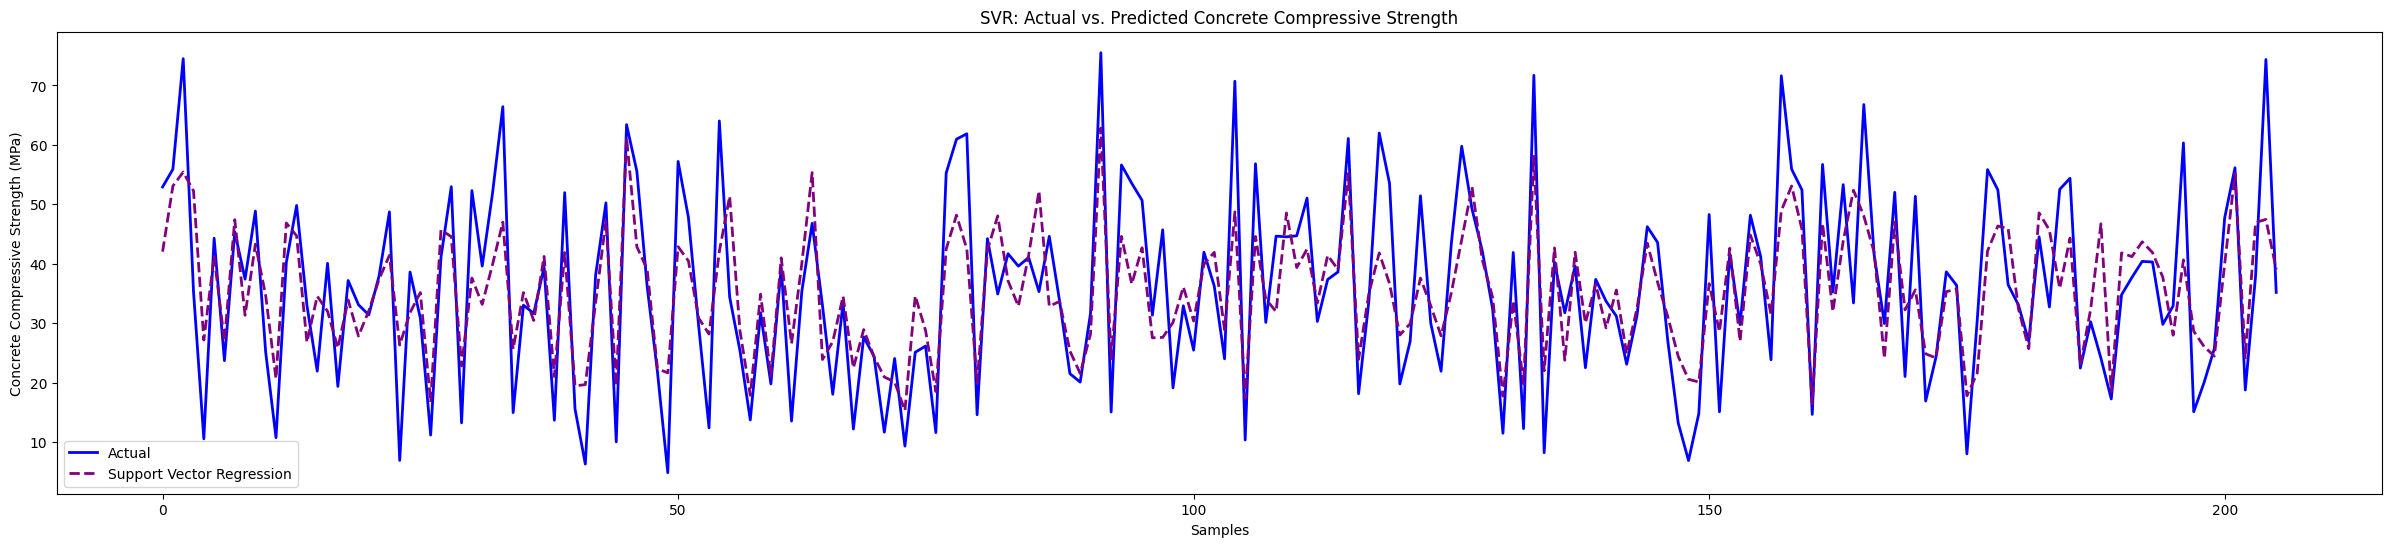

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred_svr, label='Support Vector Regression', linestyle='--', color='purple', linewidth=2)
plt.xlabel('Samples')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.title('SVR: Actual vs. Predicted Concrete Compressive Strength')
plt.legend()
plt.show()

Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_tree = tree_reg.predict(X_test)

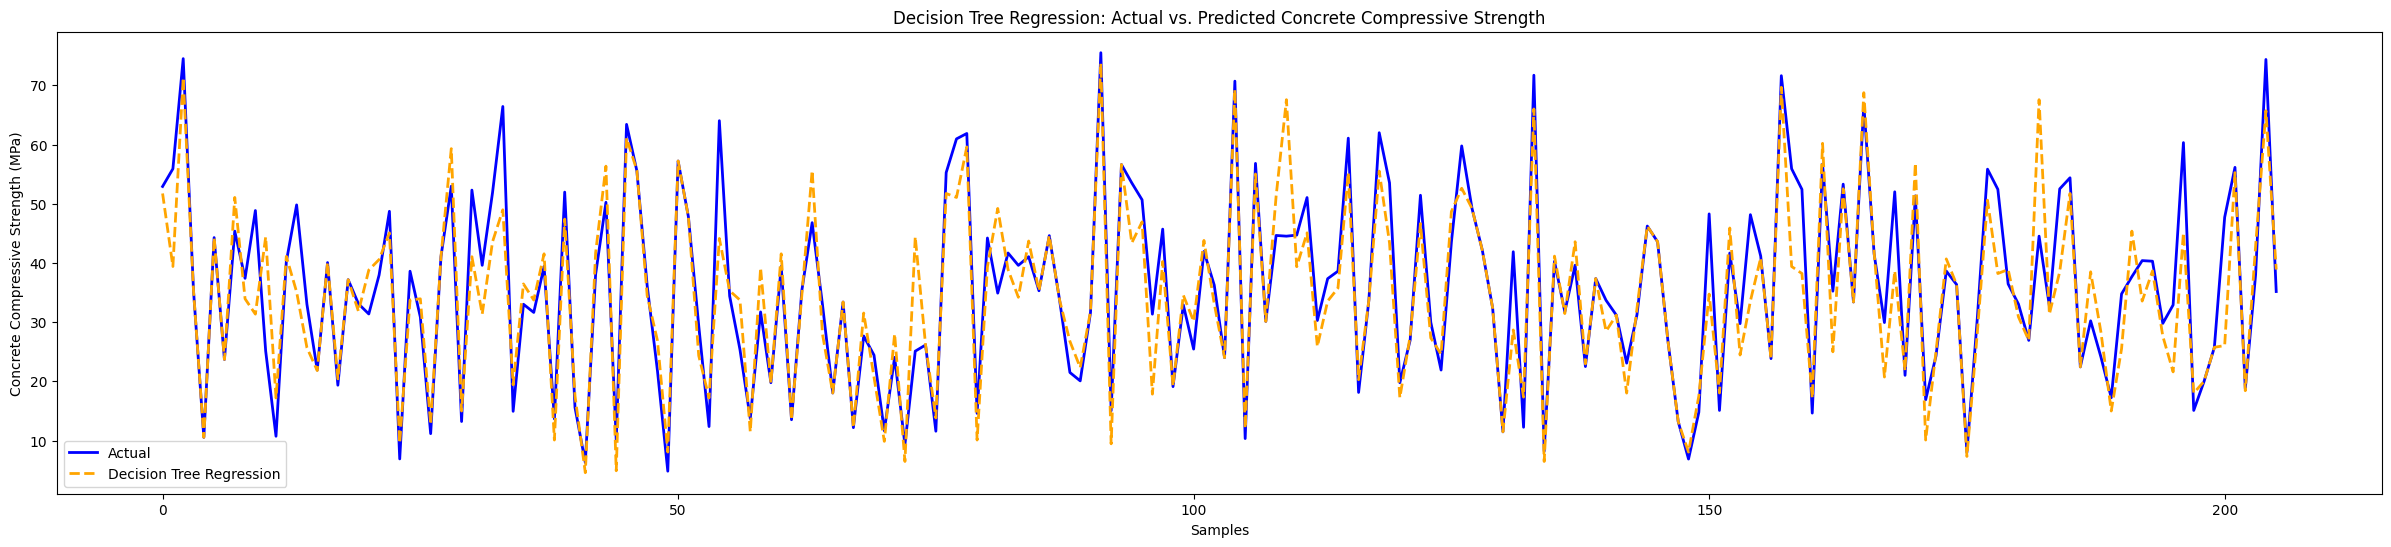

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred_tree, label='Decision Tree Regression', linestyle='--', color='orange', linewidth=2)
plt.xlabel('Samples')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.title('Decision Tree Regression: Actual vs. Predicted Concrete Compressive Strength')
plt.legend()
plt.show()

Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_forest = forest_reg.predict(X_test)

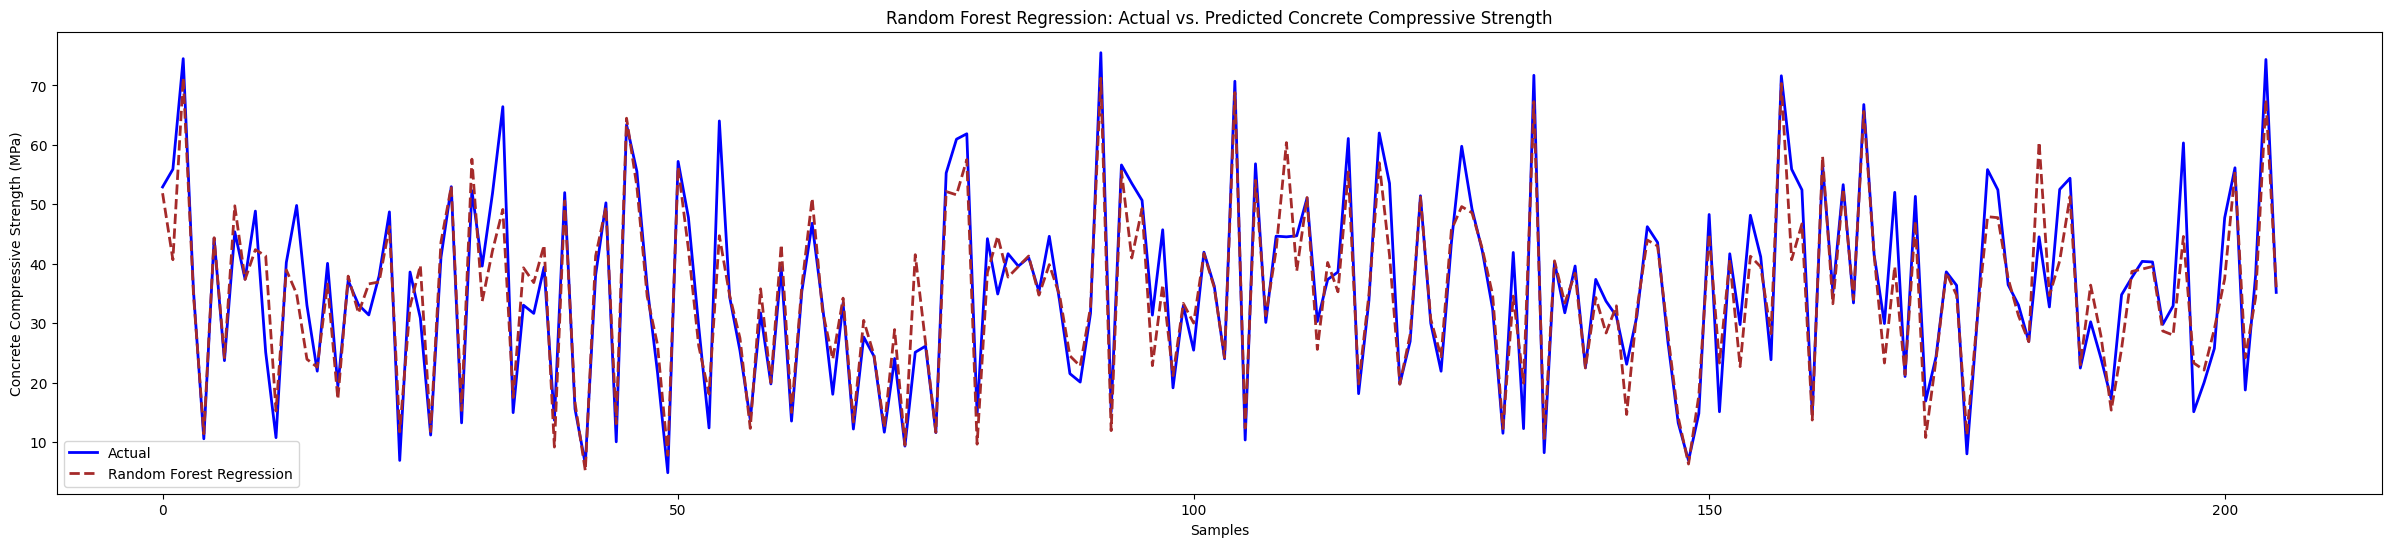

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred_forest, label='Random Forest Regression', linestyle='--', color='brown', linewidth=2)
plt.xlabel('Samples')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.title('Random Forest Regression: Actual vs. Predicted Concrete Compressive Strength')
plt.legend()
plt.show()

K-Nearest Neighbour Regression(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn = knn_reg.predict(X_test)

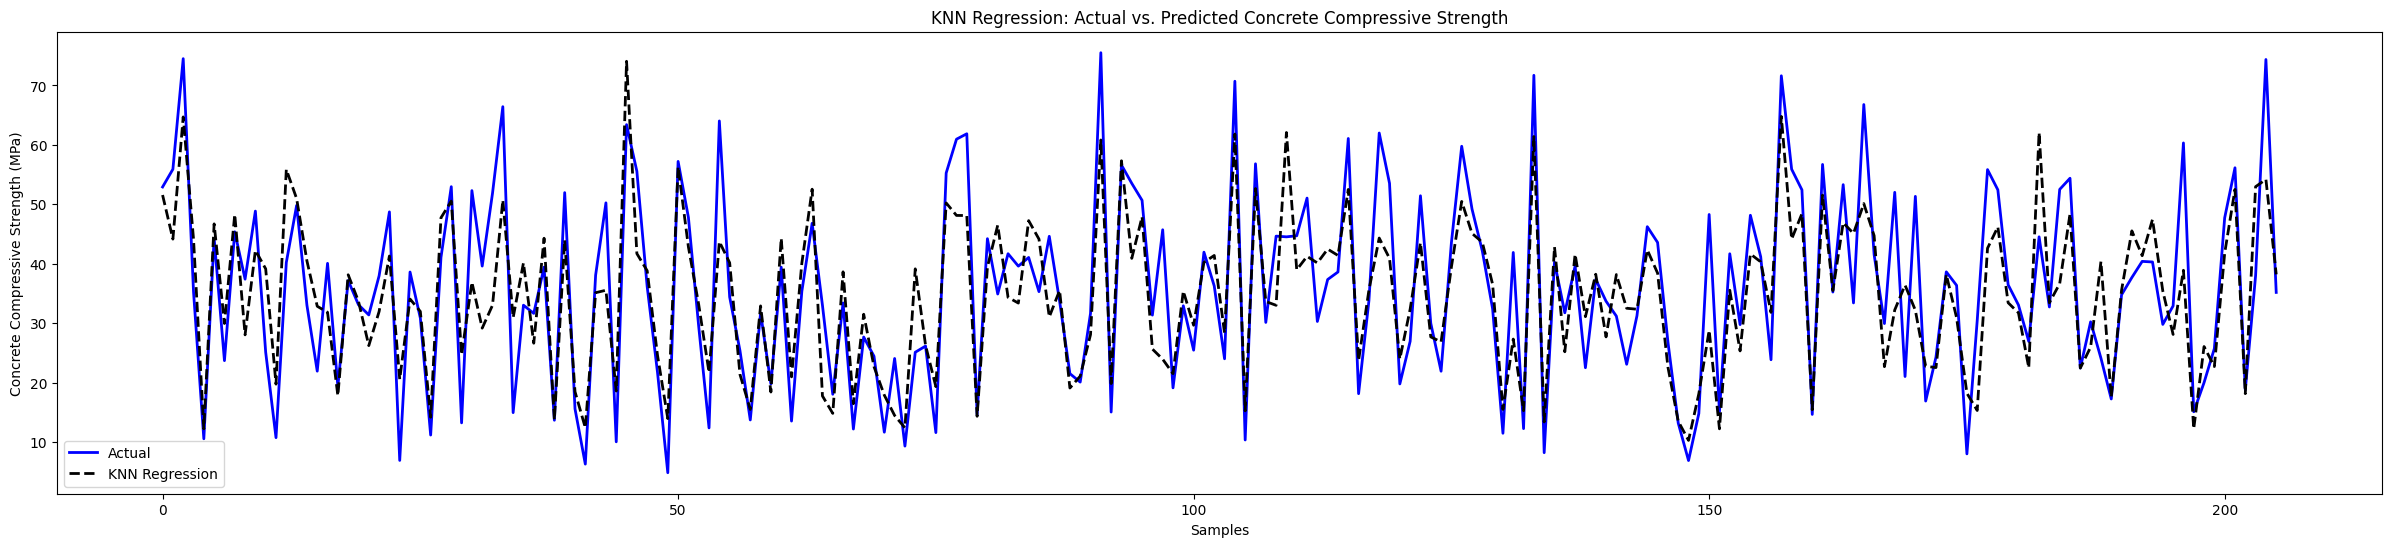

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred_knn, label='KNN Regression', linestyle='--', color='black', linewidth=2)
plt.xlabel('Samples')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.title('KNN Regression: Actual vs. Predicted Concrete Compressive Strength')
plt.legend()
plt.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
y_train_discrete = discretizer.fit_transform(y_train.reshape(-1, 1))
y_test_discrete = discretizer.transform(y_test.reshape(-1, 1))
nb_reg = GaussianNB()
nb_reg.fit(X_train, y_train_discrete.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


GaussianNB()

In [ ]:
y_pred_nb = nb_reg.predict(X_test)

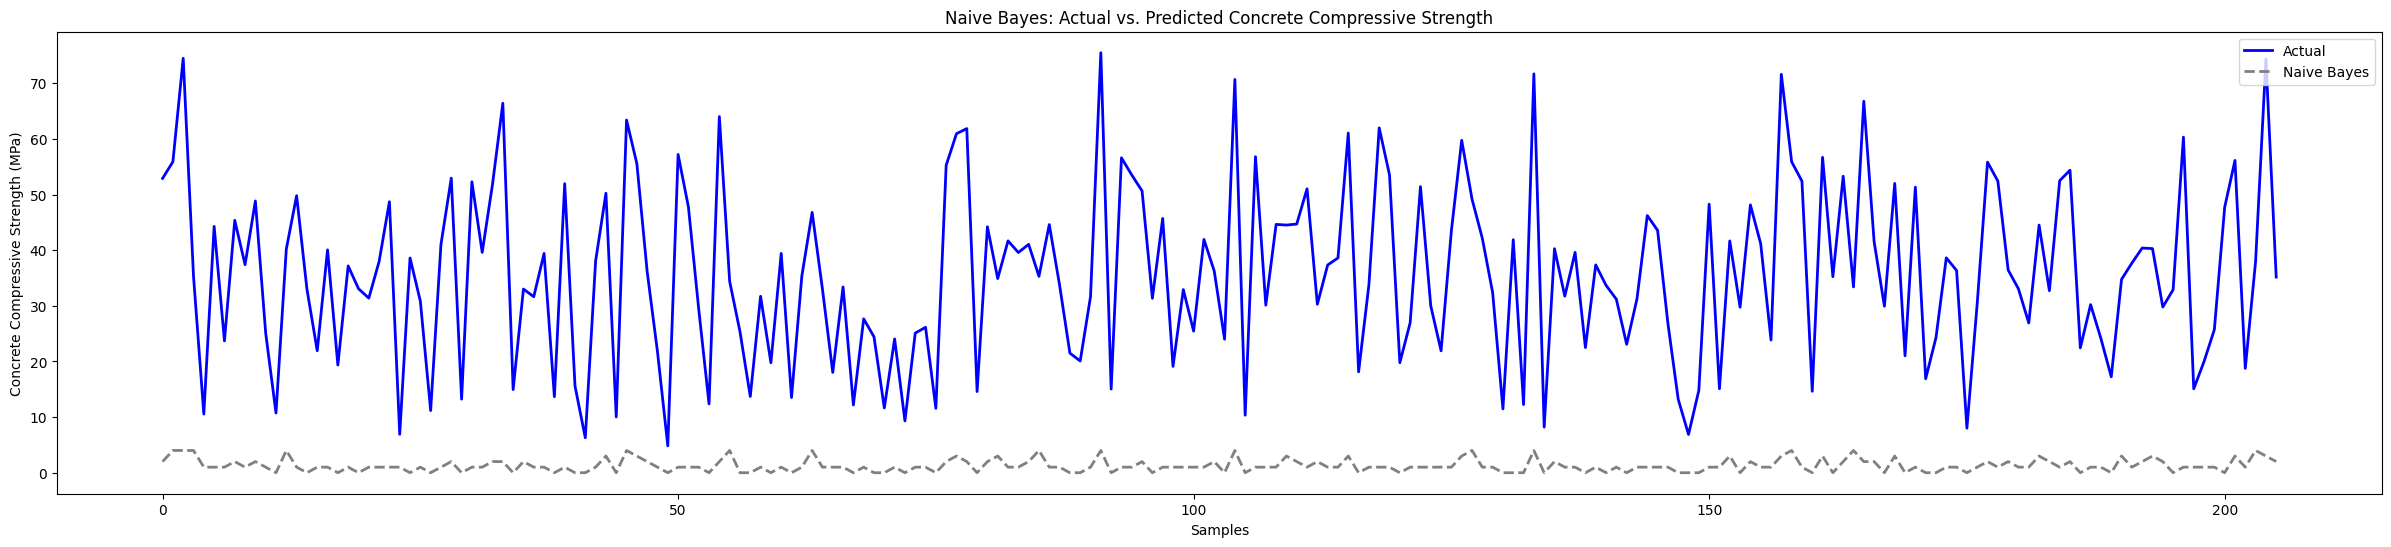

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred_nb, label='Naive Bayes', linestyle='--', color='gray', linewidth=2)
plt.xlabel('Samples')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.title('Naive Bayes: Actual vs. Predicted Concrete Compressive Strength')
plt.legend()
plt.show()

#**Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

In [ ]:
models = {
    'Linear Regression': y_pred_lr,
    'Polynomial Regression': y_pred_poly,
    'SVR': y_pred_svr,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_forest,
    'KNN': y_pred_knn
}

for name, y_pred in models.items():
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
    print(f"{name}: MAE={mae}, MSE={mse}, RMSE={rmse}, R2={r2}")

Linear Regression: MAE=17.48808989562271, MSE=459.88106313304286, RMSE=21.444837680268016, R2=-0.7847198301167668
Polynomial Regression: MAE=5.969585860171352, MSE=55.5824578805281, RMSE=7.455364369400606, R2=0.7842939778598574
SVR: MAE=7.514946966204284, MSE=88.95941487206804, RMSE=9.431829879300624, R2=0.6547637106078599
Decision Tree: MAE=4.4010194174757284, MSE=43.94516553398058, RMSE=6.629114988743262, R2=0.8294563210932445
Random Forest: MAE=3.734132387309294, MSE=29.847015251758403, RMSE=5.463242192302882, R2=0.8841688335094583
KNN: MAE=6.7652427184466015, MSE=72.41404625242717, RMSE=8.50964430822036, R2=0.7189734592565493


#**Comparison** & **Visualization**



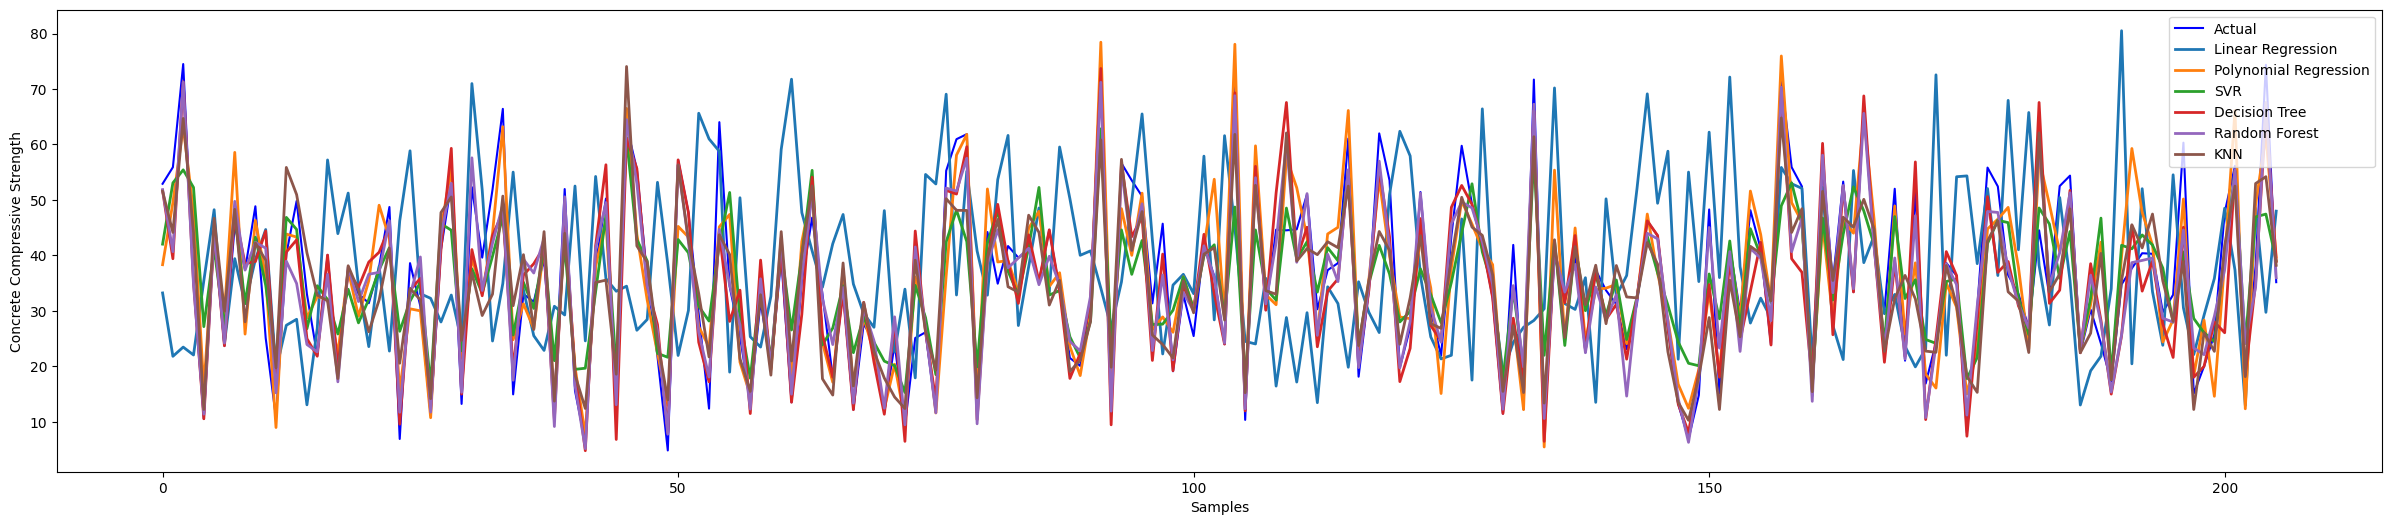

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))

plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred_lr, label='Linear Regression', linestyle='-',linewidth=2)
plt.plot(y_pred_poly, label='Polynomial Regression', linestyle='-',linewidth=2)
plt.plot(y_pred_svr, label='SVR', linestyle='-',linewidth=2)
plt.plot(y_pred_tree, label='Decision Tree', linestyle='-',linewidth=2)
plt.plot(y_pred_forest, label='Random Forest', linestyle='-',linewidth=2)
plt.plot(y_pred_knn, label='KNN', linestyle='-',linewidth=2)

plt.xlabel('Samples')
plt.ylabel('Concrete Compressive Strength')
plt.legend()
plt.show()

#**Conclusion**

**Best Overall Performer:** Random Forest Regression generally outperforms the other models due to its ability to handle non-linearity, robustness against overfitting, and strong predictive accuracy. However, it comes with higher computational costs and reduced interpretability.

**Best for Interpretability:** Linear Regression and Decision Tree Regression are preferred for their simplicity and ease of interpretation, though they may sacrifice accuracy in complex scenarios.

**Best for Non-Linear Data:** Polynomial Regression and SVR offer flexibility in capturing non-linear relationships, though they require careful tuning to avoid overfitting and ensure computational efficiency.

**Computational Efficiency:** KNN is easy to understand but becomes less practical with large datasets due to its high prediction time. Linear Regression is highly efficient for large datasets with linear relationships.